In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import optimizers, losses, metrics
from tensorflow.keras.utils import to_categorical

C:\Users\aking\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [3]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
X_train = train_data.astype(np.float32) / 255.0
X_test = test_data.astype(np.float32) / 255.0
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

In [5]:
model.fit(X_train,Y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5185 - accuracy: 0.8191 - val_loss: 0.4253 - val_accuracy: 0.8472
Epoch 2/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3842 - accuracy: 0.8604 - val_loss: 0.3711 - val_accuracy: 0.8677
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3453 - accuracy: 0.8738 - val_loss: 0.3609 - val_accuracy: 0.8657
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3199 - accuracy: 0.8823 - val_loss: 0.3472 - val_accuracy: 0.8763
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2998 - accuracy: 0.8894 - val_loss: 0.3405 - val_accuracy: 0.8773


In [6]:
mse, mae = model.evaluate(X_test,Y_test)
print("Mean squared error:" ,mse)
print("Mean abslute error:", mae)

313/313 [==============================] - 2s 5ms/step - loss: 0.3650 - accuracy: 0.8681
Mean squared error: 0.36503058671951294
Mean abslute error: 0.8680999875068665


In [7]:
import matplotlib.pyplot as plt

In [11]:
# To know the labels list
def check_label(id_,labels):
    label = Y_train[id_]
    if label not in labels:
        plt.imshow(X_train[id_])
        print(label)
        plt.show()
    return label

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


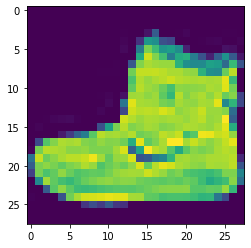

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
#To know unqiue Labels 
labels=[]
i=0;
while len(labels)<10:
    label = check_label(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1


In [19]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots'] # Insert After Running Above Code
    predictions = model.predict(X_test[id_:id_+1])
    label = labels[np.argmax(predictions)]
    print(label)
    plt.imshow(X_test[id_])
    plt.show()

1/1 [==============================] - 0s 200ms/step
trouser


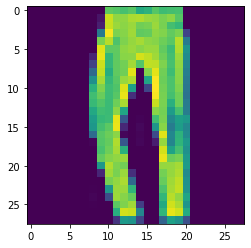

In [20]:
predict(5)

1/1 [==============================] - 0s 43ms/step
coat


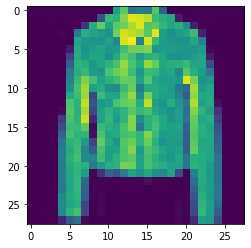

1/1 [==============================] - 0s 41ms/step
sandal


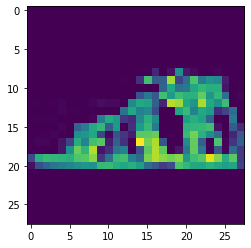

1/1 [==============================] - 0s 41ms/step
sneaker


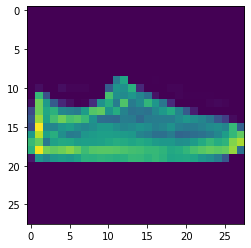

1/1 [==============================] - 0s 37ms/step
dress


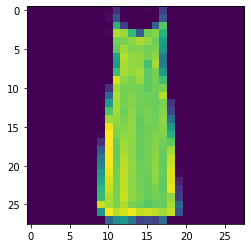

1/1 [==============================] - 0s 45ms/step
coat


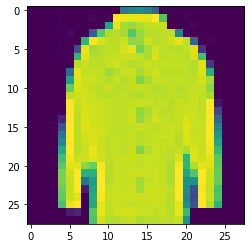

1/1 [==============================] - 0s 42ms/step
trouser


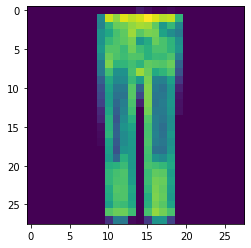

1/1 [==============================] - 0s 45ms/step
pullover


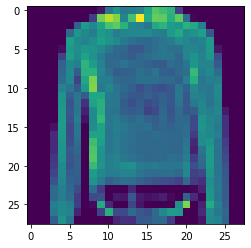

1/1 [==============================] - 0s 43ms/step
pullover


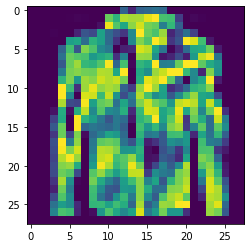

1/1 [==============================] - 0s 41ms/step
bag


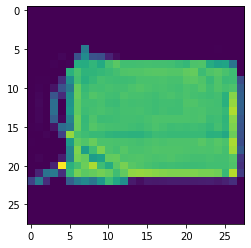

1/1 [==============================] - 0s 46ms/step
t_shirt


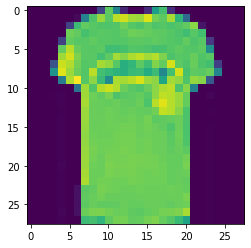

In [21]:
for i in range(10,20):
    predict(i)

In [ ]:
#if needed use afnan47